In [6]:
%ls -1q . | wc -l

135


In [11]:
%rm odeformer.pt

In [5]:
%cd {activations_path}

/content/drive/MyDrive/aisc/probing_data/activations/dimensions


In [ ]:
%pwd

'/content/drive/MyDrive/aisc/probing_data/activations/dimensions'

# Setup

In [ ]:
%load_ext autoreload
%autoreload 2  # Automatically reload all modules when they change

In [1]:
# give colab permission to access drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
repo_path = '/content/drive/MyDrive/aisc/repos/MIVLDE/subteams/LLMProbing'
odeformer_path = '/content/drive/MyDrive/aisc/repos/odeformer'
samples_path = '/content/drive/MyDrive/aisc/probing_data/samples/dimensions'
activations_path = '/content/drive/MyDrive/aisc/probing_data/activations/dimensions'

In [3]:
import sys
import os
import pickle
import importlib

In [4]:
sys.path.append(repo_path)
sys.path.append(odeformer_path)

In [10]:
from odeformer.model import SymbolicTransformerRegressor
dstr = SymbolicTransformerRegressor(from_pretrained=True)
model_args = {'beam_size': 10, 'beam_temperature': 0.8} # maybe higher beam temp better for avoiding nans in solutions?
dstr.set_model_args(model_args)

Downloading...
From (original): https://drive.google.com/uc?id=1L_UZ0qgrBVkRuhg5j3BQoGxlvMk_Pm1W
From (redirected): https://drive.google.com/uc?id=1L_UZ0qgrBVkRuhg5j3BQoGxlvMk_Pm1W&confirm=t&uuid=f2f46361-c6f0-4ab8-8029-2774ac5c4a98
To: /content/drive/MyDrive/aisc/probing_data/activations/dimensions/odeformer.pt
100%|██████████| 465M/465M [00:08<00:00, 57.9MB/s]


Loaded pretrained model


# Generate samples

In [ ]:
import importlib
import src.sample_generation  # Import the module

importlib.reload(src.sample_generation.sample_generators)  # Reload the module

from src.sample_generation.sample_generators import RandomSamplesGenerator # Re-import the class


In [ ]:
from src.sample_generation import RandomSamplesGenerator

In [ ]:
operators_to_use = "id:1,add:1,mul:1,sub:1,inv:1,pow2:1,pow3:1,exp:1,log:1,sin:1,cos:1,tan:1,arcsin:1,arccos:1,arctan:1"
min_dimension = 1
max_dimension = 2
num_samples = 800

In [ ]:
rsg = RandomSamplesGenerator(samples_path=samples_path, operators_to_use=operators_to_use, min_dimension=min_dimension, max_dimension=max_dimension, num_samples=num_samples)

In [ ]:
rsg.generate_random_samples()

Generating random samples: 100%|██████████| 800/800 [31:36<00:00,  2.37s/it]


[INFO] Data generation complete. Saved 800 samples to /content/drive/MyDrive/aisc/probing_data/dimensions


In [ ]:
# Check the number of 1 and 2 dimensional samples
samples_dir = os.fsencode(samples_path)
cnt1 = 0; cnt2 = 0
for sample_file in os.listdir(samples_dir):
  sample_name = os.fsdecode(sample_file)
  sample_path = os.path.join(samples_path, sample_name)
  with open(sample_path, 'rb') as f:
      sample = pickle.load(f)
  # print(sample.keys())
  # print(f"Encoded equation: {sample['infos']}")
  # print(f"Feature dictionary: {sample['feature_dict']}")
  if sample['feature_dict']['1D'] == 1:
    cnt1 +=1
  else:
    cnt2 +=1
print('number of 1D samples = ', cnt1)
print('number of 2D samples = ', cnt2)

number of 1D samples =  404
number of 2D samples =  396


In [ ]:
import numpy as np
# Check if any samples contain NaN
samples_dir = os.fsencode(samples_path)
for sample_file in os.listdir(samples_dir):
  sample_name = os.fsdecode(sample_file)
  sample_path = os.path.join(samples_path, sample_name)
  with open(sample_path, 'rb') as f:
      sample = pickle.load(f)
  # print(sample.keys())
  # print(f"Encoded equation: {sample['infos']}")
  # print(f"Feature dictionary: {sample['feature_dict']}")
  if [np.nan] in sample['trajectory']:
    print(sample_name)



In [ ]:
import numpy as np
# Check if any samples contain NaN
samples_dir = os.fsencode(samples_path)
for sample_file in os.listdir(samples_dir):
  sample_name = os.fsdecode(sample_file)
  sample_path = os.path.join(samples_path, sample_name)
  with open(sample_path, 'rb') as f:
      sample = pickle.load(f)
  # print(sample.keys())
  # print(f"Encoded equation: {sample['infos']}")
  # print(f"Feature dictionary: {sample['feature_dict']}")
  if sample_name == 'sample_random_913967326.pt':
    print(sample['trajectory'])
    print(sample['tree'])

[[-0.43139228]
 [-0.21025625]
 [-0.09901806]
 [-0.02776592]
 [ 0.02529895]
 [ 0.06977416]
 [ 0.11072889]
 [ 0.15207416]
 [ 0.19720174]
 [ 0.25120925]
 [ 0.3221603 ]
 [ 0.4240202 ]
 [ 0.58916009]
 [ 0.82316102]
 [ 1.09611133]
 [ 1.36471211]
 [ 1.6051111 ]
 [ 1.81037079]
 [ 1.98255652]
 [ 2.12508322]
 [ 2.24192034]
 [ 2.33730486]
 [ 2.41543679]
 [ 2.47907692]
 [ 2.53044884]
 [ 2.57172681]
 [ 2.6050358 ]
 [ 2.63236059]
 [ 2.65470754]
 [ 2.67272134]
 [ 2.6870887 ]
 [ 2.69851403]
 [ 2.7077194 ]
 [ 2.71539391]
 [ 2.72176814]
 [ 2.72692164]
 [ 2.73098046]
 [ 2.73410774]
 [ 2.7365037 ]
 [ 2.73840567]
 [ 2.74008444]
 [ 2.74160784]
 [ 2.74289611]
 [ 2.74392966]
 [ 2.74470873]
 [ 2.74525345]
 [ 2.74560377]
 [ 2.74581949]
 [ 2.74598028]
 [ 2.74618564]
 [ 2.74647967]
 [ 2.74677422]
 [ 2.74703861]
 [ 2.74725139]
 [ 2.74739899]
 [ 2.74747585]
 [ 2.74748432]
 [ 2.7474347 ]
 [ 2.74734526]
 [ 2.7472422 ]
 [ 2.74715968]
 [ 2.74713981]
 [ 2.74722286]
 [ 2.747376  ]
 [ 2.74756009]
 [ 2.74774551]
 [ 2.74790

KeyboardInterrupt: 

# Experimenting with odeformer

In [16]:
sample_name = 'sample_random_225674201.pt'
sample_path = os.path.join(samples_path, sample_name)
with open(sample_path, 'rb') as f:
    sample = pickle.load(f)
print(sample['tree'])
times = sample['times']
trajectory = sample['trajectory']
dstr.fit(times, trajectory)
pred_traj = dstr.predict(times, trajectory[0])

dstr.print()


-8.1420 + 1.7020 * x_1 | 117.4830 + -41.6801 * x_1 + -0.3686 * x_1 * (14.2224 * (x_1)**2 + -2.9194 * x_1)**-1
x_0' = 3.4510 * (10.7500 * (0.1072 + -0.1568 * x_0)**-1 + 6.3190 * x_0)**-1 + -8.8170 * x_1
x_1' = 18.9500 * sin(0.0872 + 0.0795 * x_1) + -1.5500 * x_1
x_2' = 0.6188 * x_2 * (-0.3547 + 0.1204 * x_0)**-1


In [18]:
print(sample['infos'])

{'n_points': 95, 'n_unary_ops': 3, 'n_binary_ops': 15, 'dimension': 2}


In [17]:
print(pred_traj)

None


In [ ]:
print(trajectory[0])

[-0.43139228]


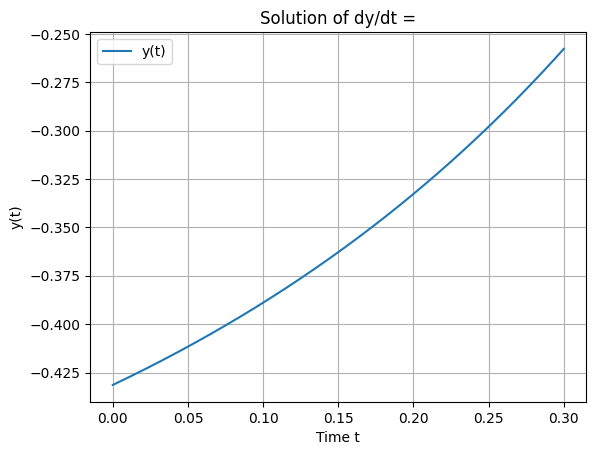

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math

# Define the ODE dy/dt = -2y
def odefunc(t, x):
    return 1.4594 * (-1 + 0.1300 * x)**2 + 2.7820 * np.sin(0.0708 + 1.2520 * x)

# Define the time domain (from t=0 to t=5)
tf = 0.3
t_span = (0, tf)
t_eval = np.linspace(0, tf, 500)  # Points where solution is computed

# Initial condition y(0) = 1
y0 = trajectory[0]

# Solve the ODE
solution = solve_ivp(odefunc, t_span, y0, t_eval=t_eval, method='RK45')

# Plot the solution
plt.plot(solution.t, solution.y[0], label="y(t)")
plt.xlabel("Time t")
plt.ylabel("y(t)")
plt.title("Solution of dy/dt =")
plt.legend()
plt.grid()
plt.show()


# Extract activations

In [24]:
import importlib
import src.activation_extraction  # Import the module

importlib.reload(src.activation_extraction.activations_extractor)  # Reload the module

from src.activation_extraction.activations_extractor import ActivationsExtractor # Re-import the class

In [25]:
act_extractor = ActivationsExtractor()

In [ ]:
act_extractor.extract_activations(dstr, samples_path, activations_path, layers_to_extract=['ffn'])

Extracting Activations:   0%|          | 0/800 [00:00<?, ?it/s]

Skipping sample: sample_random_93023016.pt (activation file already exists)
Skipping sample: sample_random_691935292.pt (activation file already exists)
Skipping sample: sample_random_845906939.pt (activation file already exists)
Skipping sample: sample_random_500458669.pt (activation file already exists)
Skipping sample: sample_random_608843088.pt (activation file already exists)
Skipping sample: sample_random_780683985.pt (activation file already exists)
Skipping sample: sample_random_676132292.pt (activation file already exists)
Skipping sample: sample_random_871619251.pt (activation file already exists)
Skipping sample: sample_random_300494290.pt (activation file already exists)
Skipping sample: sample_random_429907129.pt (activation file already exists)
Skipping sample: sample_random_258927054.pt (activation file already exists)
Skipping sample: sample_random_928861193.pt (activation file already exists)
Skipping sample: sample_random_996971554.pt (activation file already exists)


Extracting Activations:  17%|█▋        | 136/800 [00:16<01:21,  8.17it/s]


 nan in trajectory of sample sample_random_225674201.pt
Skipping sample: sample_random_373539274.pt (activation file already exists)
Skipping sample: sample_random_47491981.pt (activation file already exists)
Skipping sample: sample_random_330299107.pt (activation file already exists)
Skipping sample: sample_random_760427659.pt (activation file already exists)
Skipping sample: sample_random_7273913.pt (activation file already exists)
Skipping sample: sample_random_214269901.pt (activation file already exists)
Skipping sample: sample_random_502392087.pt (activation file already exists)
Skipping sample: sample_random_841093498.pt (activation file already exists)
Skipping sample: sample_random_379690880.pt (activation file already exists)
Skipping sample: sample_random_641717236.pt (activation file already exists)
Skipping sample: sample_random_70106692.pt (activation file already exists)
Skipping sample: sample_random_655228387.pt (activation file already exists)
Skipping sample: sample

Extracting Activations:  21%|██▏       | 170/800 [00:34<02:22,  4.42it/s]

Skipping sample: sample_random_131220747.pt (activation file already exists)

 Processing sample: sample_random_88899024.pt


Extracting Activations:  22%|██▏       | 172/800 [00:50<04:06,  2.55it/s]


 Processing sample: sample_random_544347692.pt


Extracting Activations:  22%|██▏       | 173/800 [00:52<04:27,  2.34it/s]


 Processing sample: sample_random_306310215.pt


Extracting Activations:  22%|██▏       | 174/800 [00:54<04:44,  2.20it/s]


 Processing sample: sample_random_415350787.pt


Extracting Activations:  22%|██▏       | 175/800 [01:08<08:55,  1.17it/s]


 Processing sample: sample_random_871603507.pt


Extracting Activations:  22%|██▏       | 176/800 [01:20<13:31,  1.30s/it]


 Processing sample: sample_random_639873192.pt


Extracting Activations:  22%|██▏       | 177/800 [01:21<13:36,  1.31s/it]


 Processing sample: sample_random_991643295.pt


Extracting Activations:  22%|██▏       | 178/800 [01:32<20:20,  1.96s/it]


 Processing sample: sample_random_866448723.pt


Extracting Activations:  22%|██▏       | 179/800 [01:33<19:48,  1.91s/it]


 Processing sample: sample_random_806255534.pt


Extracting Activations:  22%|██▎       | 180/800 [01:35<19:21,  1.87s/it]


 Processing sample: sample_random_210881612.pt


Extracting Activations:  23%|██▎       | 181/800 [01:45<32:13,  3.12s/it]


 Processing sample: sample_random_865722664.pt


Extracting Activations:  23%|██▎       | 182/800 [01:51<37:46,  3.67s/it]


 Processing sample: sample_random_664152754.pt


Extracting Activations:  23%|██▎       | 183/800 [01:56<40:13,  3.91s/it]


 Processing sample: sample_random_752014722.pt


Extracting Activations:  23%|██▎       | 184/800 [02:10<1:02:41,  6.11s/it]


 Processing sample: sample_random_119616466.pt


Extracting Activations:  23%|██▎       | 185/800 [02:13<55:11,  5.38s/it]  


 Processing sample: sample_random_482693180.pt


Extracting Activations:  23%|██▎       | 186/800 [02:24<1:07:38,  6.61s/it]


 Processing sample: sample_random_476363456.pt


Extracting Activations:  23%|██▎       | 187/800 [02:33<1:15:06,  7.35s/it]


 Processing sample: sample_random_734549940.pt


Extracting Activations:  24%|██▎       | 188/800 [02:42<1:19:57,  7.84s/it]


 Processing sample: sample_random_82463709.pt


Extracting Activations:  24%|██▎       | 189/800 [02:50<1:20:59,  7.95s/it]


 Processing sample: sample_random_749763331.pt


Extracting Activations:  24%|██▍       | 190/800 [02:53<1:04:21,  6.33s/it]


 Processing sample: sample_random_40659754.pt


Extracting Activations:  24%|██▍       | 191/800 [02:59<1:03:03,  6.21s/it]


 Processing sample: sample_random_482171904.pt


Extracting Activations:  24%|██▍       | 192/800 [03:02<53:24,  5.27s/it]  


 Processing sample: sample_random_318991736.pt


Extracting Activations:  24%|██▍       | 193/800 [03:07<53:20,  5.27s/it]


 Processing sample: sample_random_494419000.pt


Extracting Activations:  24%|██▍       | 194/800 [03:16<1:06:14,  6.56s/it]


 Processing sample: sample_random_274009924.pt


Extracting Activations:  24%|██▍       | 195/800 [03:33<1:36:06,  9.53s/it]


 Processing sample: sample_random_586623392.pt


Extracting Activations:  24%|██▍       | 196/800 [03:46<1:45:22, 10.47s/it]


 Processing sample: sample_random_112996625.pt


Extracting Activations:  25%|██▍       | 197/800 [03:47<1:18:22,  7.80s/it]


 Processing sample: sample_random_974809810.pt


Extracting Activations:  25%|██▍       | 198/800 [03:53<1:12:08,  7.19s/it]


 Processing sample: sample_random_229933101.pt


Extracting Activations:  25%|██▍       | 199/800 [03:59<1:07:15,  6.72s/it]


 Processing sample: sample_random_513765183.pt


Extracting Activations:  25%|██▌       | 200/800 [04:05<1:05:48,  6.58s/it]


 Processing sample: sample_random_818463622.pt


Extracting Activations:  25%|██▌       | 201/800 [04:08<56:44,  5.68s/it]  


 Processing sample: sample_random_533778500.pt


Extracting Activations:  25%|██▌       | 202/800 [04:10<44:44,  4.49s/it]


 Processing sample: sample_random_581126409.pt


Extracting Activations:  25%|██▌       | 203/800 [04:12<36:43,  3.69s/it]


 Processing sample: sample_random_112599096.pt


Extracting Activations:  26%|██▌       | 204/800 [04:13<29:40,  2.99s/it]


 Processing sample: sample_random_685065974.pt


Extracting Activations:  26%|██▌       | 205/800 [04:16<27:14,  2.75s/it]


 Processing sample: sample_random_135106762.pt


Extracting Activations:  26%|██▌       | 206/800 [04:23<41:39,  4.21s/it]


 Processing sample: sample_random_123109679.pt


Extracting Activations:  26%|██▌       | 207/800 [04:34<59:55,  6.06s/it]


 Processing sample: sample_random_214790872.pt


Extracting Activations:  26%|██▌       | 208/800 [04:40<1:00:31,  6.13s/it]


 Processing sample: sample_random_799474688.pt


Extracting Activations:  26%|██▌       | 209/800 [04:47<1:02:06,  6.31s/it]


 Processing sample: sample_random_245654468.pt


Extracting Activations:  26%|██▋       | 210/800 [04:48<47:53,  4.87s/it]  


 Processing sample: sample_random_520765858.pt


Extracting Activations:  26%|██▋       | 211/800 [04:53<46:47,  4.77s/it]


 Processing sample: sample_random_10859066.pt


Extracting Activations:  26%|██▋       | 212/800 [04:59<50:49,  5.19s/it]


 Processing sample: sample_random_397907548.pt


Extracting Activations:  27%|██▋       | 213/800 [05:03<46:46,  4.78s/it]


 Processing sample: sample_random_438726158.pt


Extracting Activations:  27%|██▋       | 214/800 [05:09<50:46,  5.20s/it]


 Processing sample: sample_random_692437257.pt


Extracting Activations:  27%|██▋       | 215/800 [05:22<1:13:58,  7.59s/it]


 Processing sample: sample_random_401050262.pt


Extracting Activations:  27%|██▋       | 216/800 [05:27<1:05:44,  6.75s/it]


 Processing sample: sample_random_839723101.pt


Extracting Activations:  27%|██▋       | 217/800 [05:28<49:52,  5.13s/it]  


 Processing sample: sample_random_552185844.pt


Extracting Activations:  27%|██▋       | 218/800 [05:39<1:07:45,  6.99s/it]


 Processing sample: sample_random_109246083.pt


Extracting Activations:  27%|██▋       | 219/800 [05:52<1:22:59,  8.57s/it]


 Processing sample: sample_random_935687350.pt


# Train probes

# Test probes